In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load processed data
df = pd.read_csv('../data/processed_tx_data.csv')
print("Data shape:", df.shape)
df.head()


Data shape: (5000, 10)


,Blockno,UnixTimestamp,Value_IN(ETH),Value_IN_USD,TxnFee_ETH,TxnFee_USD,HistoricalPrice_ETH,hour,dayofweek,GasEfficiency
0,19557289,1711929611,0.0,0.0,0.002915,8.988436,3505.52,0,0,8.988436e+06
1,19557290,1711929623,0.0,0.0,0.004286,13.216714,3505.52,0,0,1.321671e+07
2,19557290,1711929623,0.0,0.0,0.000817,2.520163,3505.52,0,0,2.520163e+06
3,19557291,1711929635,0.0,0.0,0.002683,8.271781,3505.52,0,0,8.271781e+06
4,19557291,1711929635,0.0,0.0,0.003421,10.549526,3505.52,0,0,1.054953e+07


In [3]:
features = df.drop(columns=['Blockno', 'UnixTimestamp'])  # Drop non-useful cols
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [4]:
# Isolation Forest (Anomaly Detection)
iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_preds = iso_model.fit_predict(X_scaled)

# Convert to binary (1 = normal, -1 = anomaly)
df['iso_anomaly'] = iso_preds
df['iso_anomaly'] = df['iso_anomaly'].map({1: 0, -1: 1})
print("Anomalies found by Isolation Forest:", df['iso_anomaly'].sum())


Anomalies found by Isolation Forest: 50


In [5]:
# One-Class SVM
svm_model = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
svm_preds = svm_model.fit_predict(X_scaled)

df['svm_anomaly'] = svm_preds
df['svm_anomaly'] = df['svm_anomaly'].map({1: 0, -1: 1})
print("Anomalies found by One-Class SVM:", df['svm_anomaly'].sum())


Anomalies found by One-Class SVM: 49


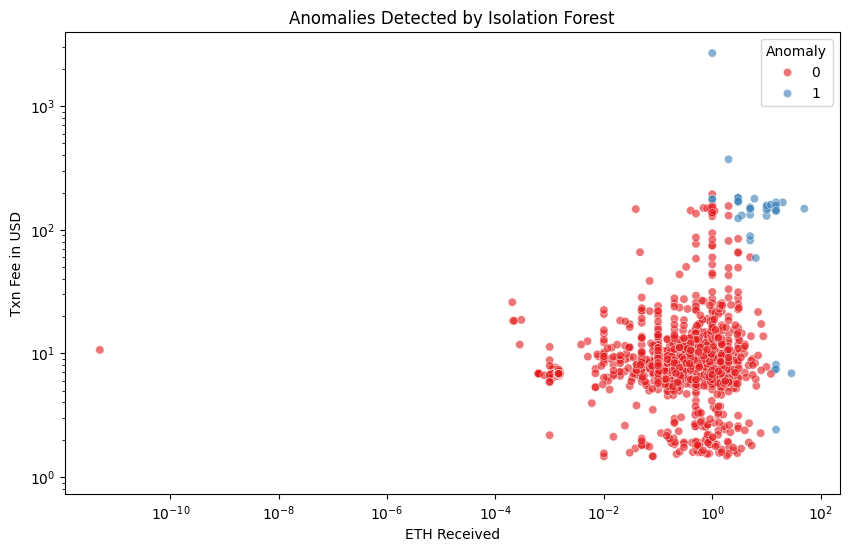

In [6]:
# Visualizing the  Anomalies (Isolation Forest)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Value_IN(ETH)', y='TxnFee_USD', hue='iso_anomaly', data=df, palette='Set1', alpha=0.6)
plt.title("Anomalies Detected by Isolation Forest")
plt.xlabel("ETH Received")
plt.ylabel("Txn Fee in USD")
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Anomaly')
plt.show()


In [7]:
# Save Anomaly-Tagged Data
df.to_csv('../data/tx_with_anomalies.csv', index=False)
print("Saved anomalies to '../data/tx_with_anomalies.csv'")


Saved anomalies to '../data/tx_with_anomalies.csv'
